# Statistique descriptive avec R
L'analyse de données quantitatives en géographie permet d'obtenir des informations précises sur un territoire. Cela dit, il est nécessaire de faire le tri au sein de ces données afin de se focaliser sur celles qui sont pertinentes pour aborder une problématique donnée. Dans cette idée, il convient généralement de commencer par une *analyse exploratoire des données*. **R** offre un certain nombre de fonctionnalités très utiles dans cette démarche.

## 1) Préparation d'un fichier Excel pour R
---
#### 1.1) Traitement des données sur Exel
La plupart des données spatiales disponibles sur internet sont au format **Excel** (*.xls* ou *.xlsx*). Il est souvent nécessaire de "nettoyer" ces jeux de données pour pouvoir les utiliser dans un logiciel de programmation tel que **R**. Il est nécessaire de porter une attention particulière sur:

- **Les éléments de mise en page:** Le fichier final ne doit être composé que des *données à proprement parler*, des *en-têtes* (noms des variables) et des noms des *entités spatiales*. Tout autre information (*p.ex :* logo ou nom de l'institution responsable de la collecte des données, titre détaillé du jeu de données, date de mise à jour) doivent être supprimées du fichier utilisé dans **R**.
- **La nomenclature des variables:** Pour des raisons pratiques (encodage, longueur de code) il est préférable de nommer les variables de manière *brève* et *schématique*. *P.ex:* "denspop17" au lieu de "densité de population 2017" ou "ept3" au lieu de "nombre d'équivalents plein temps du secteur tertiaire". L'important est de trouver des abréviations explicites pour soi-même. Il peut également être utile de créer un fichier annexe contenant une table de correspondance entre les abréviations et les noms des variables.
- **Les données manquantes:** Il peut arriver que des données soient inconnues pour certaines entités spatiales, pour des raisons de problème de récolte ou de secret statistique. Il existe diverses méthodes pour traiter de ces cas particuliers.

*NB:* Des erreurs de manipulations ayant comme résultat des données erronées peuvent se produire à n'importe laquelle de ces étapes. Afin de pouvoir revenir en arrière en cas de problème, il est généralement judicieux d'effectuer ces manipulations sur des copies des fichiers originaux et de conserver soigneusement ces derniers.

#### 1.2) Exportation au format *CSV*
Une fois le fichier préparé sur **Excel**, il faut exporter le jeu de données dans un format de texte. Le format *CSV* pour *Comma-Separated Values* (valeurs séparées par des virgules) est l'un des plus connus. Dans le cadre ce cours, vous rencontrerez un autre format similaire, le **TSV**, pour *Tab-separated values* (valeurs séparées par des tabulations), présentant certains avantages notamment en terme de poids. Pour enregistrer un jeu de données au format **csv**, allez dans **Fichier > Enregistrer sous**. Dans la fenêtre qui s'ouvre, sous le menu déroulant **Format de fichier** sélectionnez **CSV UTF-8**. Si ce dernier choix n'est pas disponible cherchez **CSV**. Pour le format **TSV**, sélectionnez **Texte (séparateur : tabulation)**. Enfin, enregistrez votre fichier à l'emplacement de votre choix.

*NB:* Excel a la fâcheuse tendance de demander de multiples validations pour la sauvegarde d'un fichier *csv*, même s'il n'a pas été modifié depuis la dernière sauvegarde. Soyez patients et sauvegardez correctements tous vos fichiers. Pensez également à conserver la version *.xls* ou *.xlsx* d'origine, elle vous sera utile en cas d'erreur nécessitant de retravailler le fichier de données initial.

## 2) Importation du fichier CSV dans R

#### 2.1) Préparation du répertoire de travail

Pour que R accède à des fichiers de données, il faut naturellement indiquer leur emplacement. La manière la plus efficace pour ce faire est de les placer dans un même dossier et de définir ce dernier comme étant **l'espace de travail *(ou working directory)* de R**

Il y a deux manières d'effectuer cette opération sur **R**. La première est en ligne de commande, de la manière suivante:

In [2]:
setwd("../data/stats")

Ici `setwd()` est la fonction indiquant le définition du répertoire de travail et `"../data/stats"` le chemin d'accès du dossier. Si vous ignorez le chemin d'accès de votre dossier vous pouvez toujours le retrouver en naviguant dans les menus : dans la barre d'outils, cherchez **Session > set working directory** et cliquez sur **Choose directory**. Une boîte de dialogue s'ouvre et vous pourrez alors chercher votre dossier à l'aide de votre explorateur de dossier.
Notez qu'il s'agit bien de sélectionnet le **dossier** et non les fichiers qu'il contient. Une fois trouvé, cliquez sur **ouvrir** ou **choisir le dossier**. Vous constaterez dans la console de **R** qu'une ligne de commande similaire s'est exécutée.

Vous pouvez vous assurer que vous avez sélectionné le bon dossier, vous pouvez afficher son contenu avec la commande suivante:

In [3]:
list.files(getwd())

[1] "build.xlsx"      "demo.csv"        "demo.tsv"        "demo.xlsx"      
 [5] "geostat"         "households.xlsx" "income.xlsx"     "move.xlsx"      
 [9] "socclass.xlsx"   "soceco.xlsx"     "test.csv"

#### 2.2) Importer le fichier avec *read.csv()*

Vous pouvez désormais importer votre fichier dans R à l'aide de la fonction *read.csv()* en exécutant la commande suivante:

In [4]:
read.csv(file="demo.csv", sep=";")

Z05,NAME,PTOT,PM,PF,P0004M,P0004F,P0509M,P0509F,P1014M,⋯,PNSAS,PNSEAS,PNFE,PNOCE,PNNAF,PNSUBAF,PNNAM,PNCAM,PNSAM,PNNON
1.0,Reppischtal,5214,2621,2593,129,132,120,130,209,⋯,0,45,4,23,5,15,23,6,28,0
2.1,Affoltern am Albis Zentrum,7295,3628,3667,208,184,160,199,165,⋯,43,50,12,5,14,10,51,5,15,0
2.2,Affoltern am Albis-Zwillikon Hedingen,6666,3383,3283,173,157,171,163,210,⋯,25,4,0,0,4,61,6,4,34,0
3.0,Bonstetten,5522,2733,2789,180,151,137,180,172,⋯,0,4,9,7,6,0,0,0,32,0
4.0,Oberalbis,5485,2625,2860,134,127,229,255,182,⋯,0,7,0,11,0,0,14,5,0,0
9.0,Mettmenstetten,6704,3326,3378,207,98,212,201,181,⋯,3,23,8,0,0,5,4,10,16,0
10.0,Obfelden-Ottenbach,7151,3564,3587,207,210,234,201,188,⋯,15,20,9,0,6,21,0,5,28,0
14.0,Wettswil-Aesch,6449,3152,3297,198,146,155,234,160,⋯,33,40,0,0,4,37,0,5,5,0
27.0,Feuerthalen-Flurlingen,5362,2789,2573,170,184,146,130,149,⋯,0,36,5,0,5,44,14,5,3,0
28.0,Henggart-Irchel,6170,2962,3208,146,207,169,179,230,⋯,0,4,4,0,0,2,11,5,16,0


Ici, `sep=";` spécifie quel est le sépareteur des valeurs. Dans le cas d'un fichier *tsv*, ce paramètre serait `sep=\t`.

*NB:* Par défaut **Excel** enregistre les fichiers *tsv* avec une extension *.txt*. Vérifiez bien cette denière lors de l'imporation du fichier.

La commande précédente ne permet que d'afficher le contenu du fichier mais elles ne sont pas sauvegardées dans la mémoire de **R**. Pour utiliser ces données par la suite, il faut les enregistrer dans une variable comme suit:

In [5]:
dfr = read.csv(file="demo.csv", sep=";")

De cette manière, le contenu du tableau est enregistré dans une variable appelée `dfr` (pour *data frame*) et il est maintenant possible de travailler dessus. Les variables stockées dans la mémoire de **R** apparaissent dans le volet *Environnement*.

**HINT:** en cas de doute sur l'utilisation d'une fonction, vous pouvez consultez la documentation intégrée à **R** en inscrivant un `?` avant le nom de la fonction: 

In [6]:
?read.csv()

## 3) Statistiques descriptives
---

La variable `dfr` contient l'intégralité du jeu de données. Pour n'extraire qu'un attribut spécifique du tableau, il faut utiliser la notation `$`. *P.ex* La commande suivante permet d'extraire l'attribut `PTOP` (population) du jeu de données `dfr`: 

In [7]:
dfr$PTOT

[1] 5214 7295 6666 5522 5485 6704 7151 6449 5362 6170 7721 5560 5772 5372
  [15] 6338 5325 5911 7122 4843 8519 4365 8025 9206 4885 6540 5587 5711 3847
  [29] 5567 5029 7379 4458 4723 4752 5630 6803 6135 6417 8567 4937 6387 4293
  [43] 5115 6458 5424 6425 4406 4284 7667 6644 7287 5290 4705 7897 5319 5446
  [57] 6880 4855 4175 4034 5600 5075 5747 6192 6638 5547 4698 4695 4223 4810
  [71] 4581 4719 8098 7627 5366 5584 7176 5342 4981 5354 7101 5007 4732 5138
  [85] 5339 4993 6281 8213 5979 7563 5476 4983 4643 7288 6600 7168 5979 5017
  [99] 5548 6165 6335 6269 5914 5052 4634 5201 5282 5381 7440 3756 4597 4996
 [113] 4372 4261 8162 7844 5589 4588 4685 4881 4816 6037 4688 5020 6648 5400
 [127] 5370 6716 6092 5504 8060 4736 8667 5235 5347 8948 5695 7455 7309 7346
 [141] 5026 7064 4932 5154 4626 6529 4837 4405 6668 6571 4327 5379 4630 5065
 [155] 5244 4913 4769 6478 5404 5498 4678 4242 4274 4614 4323 5015 6998 6395
 [169] 5083 4612 6255 4733 4759 4610 7299 6773 5852 5611 5470 5204 6010 5549
 [183] 4610 4944 4465 4332 4625 6089 4848 5413 6117 5801 6230 4391 5585 6080
 [197] 4773 5197 5515 4920 4985 4475 6398 4318 4406 6307 5549 4379 4565 4569
 [211] 4995 4542 4899 4674 4552 5170 4554 4619 4759 4564 5004 4999 5010 4914
 [225] 5669 5410 5307 5475 4578 5324 4670 5947 4744 4875 5655 5942 5585 6341
 [239] 6037 6473 7680 4765 5105 4539 6430 7159 4797 7048 7578 7804 5472 6164
 [253] 5216 5076 6942 6758 5287 7214 6144 6296 5462 4878 6556 5712 5711 4904
 [267] 5561 5330 6082 6222 4867 5222 6561 6367 4826 5518 5367 4664 4824 5101
 [281] 6375 7614 7105 5877 4753 5299 5304 5314 4856 5869 6396 7415 5877 5656
 [295] 5223 4868 4387 6234 5216 5532 5612 3492 3673 3872 4957 5359 3614 4325
 [309] 3797 3935 4482 7749 8317 4969 4530 4973 5877 6067 5946 5118 6283 4829
 [323] 7259 4831 7957 4545 6368 7016 7649 6517 7093 6606 6231 5677 4690 7594
 [337] 6154 7751 4375 5059 4855 6840 6192 5642 7187 5226 5289 6137 6749 5214
 [351] 5349 5360 6964 7904 6634 5434 7430 5984 5306 5138 6315 7580 6736 6060
 [365] 5283 7479 6086 6302 7525 6940 6183 6263 7574 5832 4185 5568 5655 5767
 [379] 5616 6034 6627 6506 7525 5120 6539 4399 6621 6035 5270 5296 5448 5325
 [393] 6358 5866 4713 7156 5606 4159 5172 4978 8116 6230 4386 4922 8141 5258
 [407] 7181 5918 7348 7906 6634 5379 6360 5084 6030 7291 4986 5427 5234 7139
 [421] 7321 8522 7105 7785 5747 6188 6498 5914 6719 5506 5166 4737 5020 4965
 [435] 6412 7061 4696 5532 6666 4875 4420 4169 5207 5217 5413 6185 7353 5275
 [449] 7212 6635 6957 4603 5018 6220 7770 4272 6257 6029 5834 7260 6353 8256
 [463] 9099 4930 5859 4951 4479 5133 8199 6535 6517 6927 9271 5633 8040 6918
 [477] 4889 4363 4802 5228 4638 4820 4954 5860 4583 6877 6900 5324 6501 5984
 [491] 7338 8589 6455 4755 5903 4528 5304 5518 6971 4758 4386 5779 5236 5906
 [505] 3296 5525 5745 4831 4955 5124 4647 5223 4375 5003 7070 8080 6451 5555
 [519] 6331 4696 4891 4760 5575 6544 5216 4995 6771 5567 4944 4599 4951 8567
 [533] 5865 5478 4645 4488 9262 8250 4703 4735 4999 4653 5151 5609 6003 6125
 [547] 7144 5228 6663 4469 5218 6998 7238 5713 5160 5896 4235 5259 5691 8055
 [561] 7460 4871 5173 4659 4229 4665 4845 4174 4953 4258 6211 7674 6747 6833
 [575] 5130 6891 7429 4977 4380 6900 5008 5997 5128 7476 6697 4732 7028 8198
 [589] 7641 5862 6160 4718 4705 4778 5846 4552 5837 4613 6064 5152 6473 5933
 [603] 5595 5692 5946 6755 5062 7936 5796 7823 5283 9185 7053 8805 4939 8114
 [617] 5192 4787 4759 6804 7882 6213 6718 5001 5647 6797 4557 4763 4897 5306
 [631] 4168 6375 4877 7528 4101 5683 4492 4720 4770 4975 6362 5034 5110 5232
 [645] 5603 8564 7029 5997 6262 5892 5286 5307 5330 5509 4824 5257 5604 5326
 [659] 6738 4110 4751 5235 4739 4539 6069 4435 6365 5288 6574 5702 4843 4877
 [673] 5154 5056 8457 4563 4889 4551 4701 4201 4891 6045 5123 5603 5890 6241
 [687] 6143 5699 5892 5246 6290 5902 6084 4746 4894 5415 5424 7723 6220 7508
 [701] 6222 4851 7292 6916 5876 5784 4898 4689 5692 5980 6733 6422 5668 6049
 [715] 5010 4058 6602 8331 6941 5341 5030 4776 4515 4757 5024 6218 4318 4224

Pour éviter des sorties peu lisibles ce genre, il est également possible de n'afficher que les premières valeurs (pour de brefs aperçus ou vérifications) à l'aide de la fonction `head()`. Ici, le paramètre `10` spécifie d'afficher les 10 premières valeurs:

In [8]:
head(dfr$PTOT, 10)

[1] 5214 7295 6666 5522 5485 6704 7151 6449 5362 6170

#### 3.1) Moyenne

La fonction `mean()` permet de calculer la moyenne d'une variable:

In [9]:
mean(dfr$PTOT)

[1] 5727.904

La population moyenne des zones Z05 est de 5727.9 habitants sur l'ensemble de la Suisse

#### 3.2) Ecart-type

L'écart-type d'une variable se calcule avec la fonction `sd()`:

In [10]:
sd(dfr$PTOT)

[1] 1130.68

L'écart-type de la population totale des zones Z05 est de 1130.7.

#### 3.3) Corrélations

La corrélation indique la force du lien/de l'opposition qu'il y a entre deux variable *quantitatives*. Une corrélation  de 1 indique que les deux variables sont fortement liées. Une valeur de -1 indique que les deux variables se repoussent. Sur **R** La corrélation se calcule à l'aide de la fonction `cor()`:

In [11]:
cor(dfr$PNSCHB, dfr$PNSFOR1)

[1] -0.5404849

Il y a donc une opposition entre le nombre d'habitants de nationalité Suisse depuis leur naissance (`PNSCHB`) et les étrangers de première génération (`PNSFOR1`) et pour l'ensemble des zones Z05 du pays. Cela dit, cette valeur ne permet en aucun cas une analyse statistique. Pour déterminer si le lien/l'oppostiion est significatif, il faut effectuer un test:

In [12]:
cor.test(dfr$PNSCHB, dfr$PNSFOR1)


	Pearson's product-moment correlation

data:  dfr$PNSCHB and dfr$PNSFOR1
t = -23.717, df = 1363, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5769964 -0.5018175
sample estimates:
       cor 
-0.5404849 


La valeur **P** (probabilité de se tromper à *posteriori*) proche de zéro indique que ce lien est significatif. On peut donc dire que le nombre d'habitants ayant nationalité Suisse depuis leur naissance est significativement opposé au nombre d'étrangers de première génération.

#### 3.4) Histogramme des fréquences

L'histogramme (à ne pas confondre avec le "diagramme en bâtons" ou "*barplot*") est un outil permettant d'analyser rapidement la distribution d'une variable. Il est implémenté dans **R** avec la fonction *hist()*

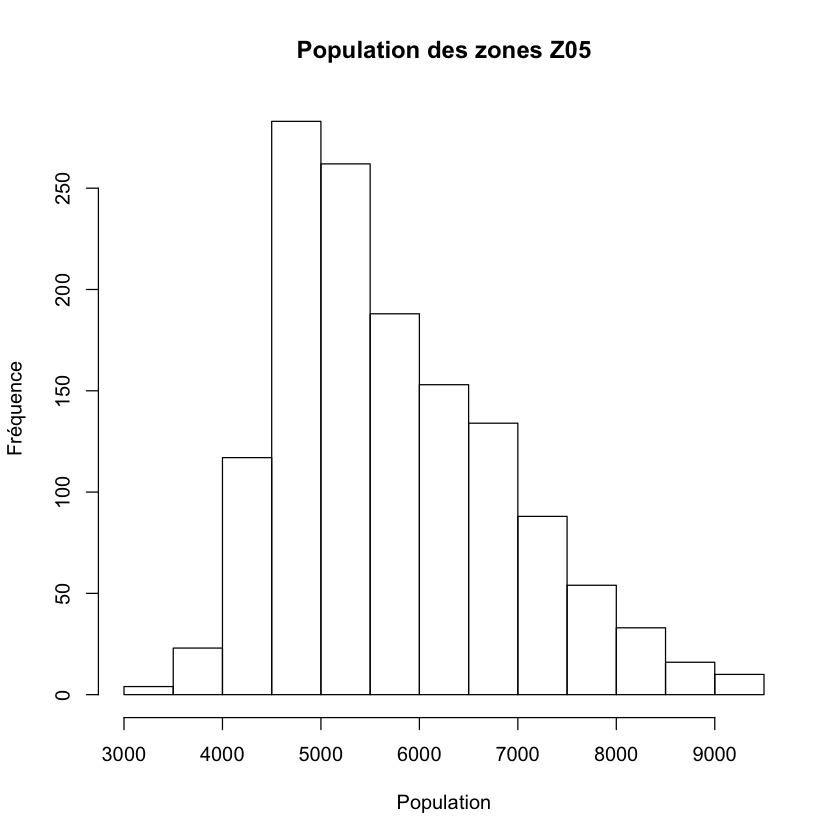

In [13]:
hist(dfr$PTOT, main="Population des zones Z05", xlab="Population", ylab="Fréquence")

Dans cet exemple, quelques paramètre de base sont spécifiés lors de l'utilisation de cette fonction:
- *main* indique le titre principal du graphique
- *xlab* et *ylab* indiquent respectivement le nom de l'axe des abcisses et de l'ordonnée.

Il existe d'autres paramètres permettant de personnaliser le rendu de votre graphique pour y ajouter des couleurs, des sous-titres ou des légendes (voir documentation **R** à l'aide de la commande `?hist()`). Les fonctions de base de **R** ne permettent cependant que des réglages de base. Pour effectuer des graphiques plus élaborés, il faut souvent faire appel à des librairies (ou *packages*) externes dédiés à ce genre de manoeuvres, tels que *ggplot2*.

#### 3.5) Nuage de points

Le nuage de points (ou *scatterplot*) permet de visualiser simplement le l'éventuel lien entre deux variables. La fonction de base de **R** pour la création d'un *scatterplot* est *plot()*.

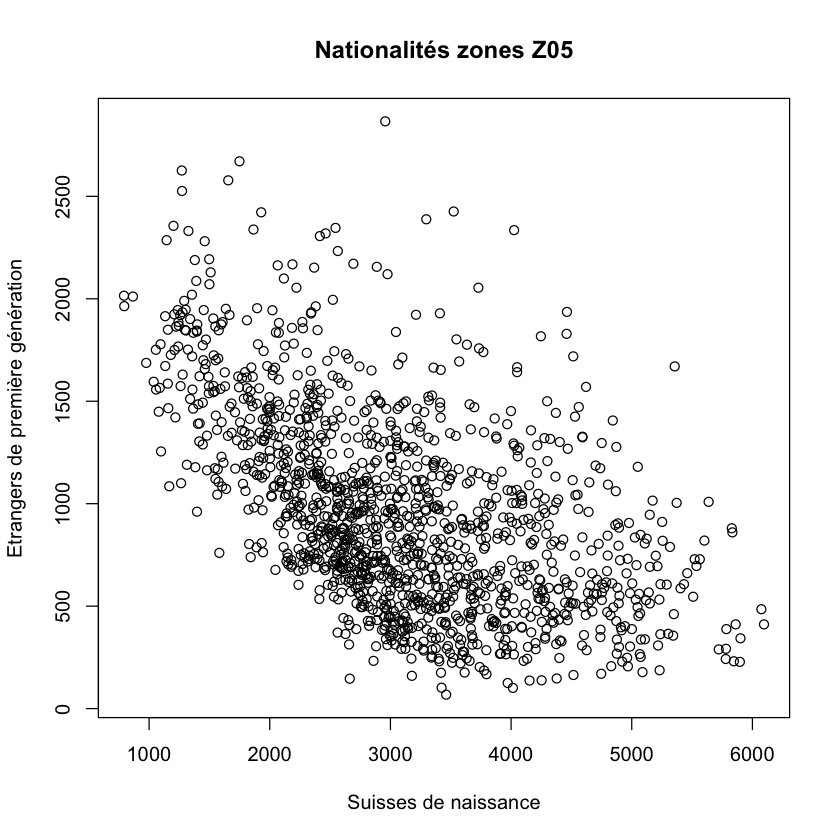

In [14]:
plot(dfr$PNSCHB, dfr$PNSFOR1, main="Nationalités zones Z05", xlab="Suisses de naissance", ylab="Etrangers de première génération")

Les paramètres spécifiés (*main*, *xlab*, *ylab*) sont les mêmes que pour l'histogramme plus haut.


## 4) Calcul d'une nouvelle variable
---
Les données brutes contiennent généralement des données en valeur **absolues**, alors que les analyses statistiques se font généralement sur la base de valeurs **relatives**. De ce fait, les donnnées brutes doivent alors être manipulées afin d'obtenir ces nouvelles valeurs. L'exemple suivant montre comment calculer *la part des jeunes de moins de 20 ans* dans la population sur la base des données brutes de population. Les données de démographiques regroupant de nombreuses informations (âge, religion, état civil, origine...) il faut retrouver quelles colonnes du tableau de données sont liées aux données sur l'âge. La commande *colnames()* permet d'afficher le nom des colonnes du fichier de données.

In [15]:
colnames(dfr)

[1] "Z05"     "NAME"    "PTOT"    "PM"      "PF"      "P0004M"  "P0004F" 
  [8] "P0509M"  "P0509F"  "P1014M"  "P1014F"  "P1519M"  "P1519F"  "P2024M" 
 [15] "P2024F"  "P2529M"  "P2529F"  "P3034M"  "P3034F"  "P3539M"  "P3539F" 
 [22] "P4044M"  "P4044F"  "P4549M"  "P4549F"  "P5054M"  "P5054F"  "P5559M" 
 [29] "P5559F"  "P6064M"  "P6064F"  "P6569M"  "P6569F"  "P7074M"  "P7074F" 
 [36] "P7579M"  "P7579F"  "P8084M"  "P8084F"  "P8589M"  "P8589F"  "P90MM"  
 [43] "P90MF"   "PMSSIN"  "PMSMARR" "PMSWID"  "PMSDIV"  "PRPROT"  "PRCATH" 
 [50] "PROCHR"  "PRJEW"   "PRMUSL"  "PROTH"   "PRNOREL" "PRUNKN"  "PLGER"  
 [57] "PLFRA"   "PLITA"   "PLRUM"   "PLENG"   "PLSPA"   "PLPOR"   "PLSRH"  
 [64] "PLALB"   "PLOTEU"  "PLTUR"   "PLOEEU"  "PNSCHB"  "PNSCHN"  "PNSFOR1"
 [71] "PNSFOR2" "PTSB"    "PTS01Y"  "PTS14Y"  "PTS59Y"  "PTS10MY" "PTAB"   
 [78] "PTAFOR"  "PTACH"   "PTACT"   "PNCH"    "PNCEU"   "PNNWEU"  "PNNEU"  
 [85] "PNWEU"   "PNSWEU"  "PNSEEU"  "PNECEU"  "PNEEU"   "PNCAS"   "PNME"   
 [92] "PNSAS"   "PNSEAS"  "PNFE"    "PNOCE"   "PNNAF"   "PNSUBAF" "PNNAM"  
 [99] "PNCAM"   "PNSAM"   "PNNON"

Les noms des données étant parfois peu explicites, il faut se référer aux métadonnées incluses dans les fichiers *xls* d'origine (généralement sur la deuxième feuille du classeur). Les données qui nous intéressent ici sont les tranches d'âge allant de 0 à 19 ans, répartis de cette manière:
- *P0004M* : personnes de sexe masculin âgées entre 0 et 4 ans
- *P0004F* : personnes de sexe féminin âgées entre 0 et 4 ans
- *P0409M* : personnes de sexe masculin âgées entre 4 et 9 ans  
....   
- *P1519F* : personnes de sexe féminin âgése entre 15 et 19 ans

La somme de ces différentes valeurs aura pour résultat la population totale âgée de moins de 20 ans. Pour obtenir le taux de jeunes au sein de cette population il faudra diviser cette valeur par la population totale *PTOT*.

Pour utiliser les valeurs contenues dans l'une des colonnes, il faut utiliser la notation `$` permettant de se référer à l'en-tête (ou *header*) de la colonne. A ne pas confondre avec la notation `$` de Excel permettant de bloquer une case/colonne lors d'un calcul d'une série de valeurs. La commande ci-dessous permet donc d'afficher la colonne population totale (ici résumées aux 6 premières valeurs à l'aide de la fonction *head()* )

In [16]:
head(dfr$PTOT)

[1] 5214 7295 6666 5522 5485 6704

Ainsi, le calcul de la part de jeune au sein de la population s'effectue de la manière suivante (ici résumées aux 6 premières valeurs à l'aide de la fonction *head()*)

In [17]:
head((dfr$P0004M + dfr$P0004F + dfr$P0509M + dfr$P0509F + dfr$P1014M + dfr$P1014F + dfr$P1519M + dfr$P1519F) / (dfr$PTOT))

[1] 0.2332183 0.2032899 0.2412241 0.2366896 0.2670921 0.2453759

Si cette commande permet d'*afficher* le résultat du calcul, les valeurs ne sont pas enregistrées dans le set de données. Pour ce faire, il faut *déclarer* une nouvelle variable à l'aide du signe **=** :

In [18]:
dfr$jeunes = (dfr$P0004M + dfr$P0004F + dfr$P0509M + dfr$P0509F + dfr$P1014M + dfr$P1014F + dfr$P1519M + dfr$P1519F) / dfr$PTOT

Sur cette ligne, on *déclare* une variable *dfr$jeunes* (*i.e.* une nouvelle colonne *jeunes* dans le set de données *dfr*) dont le contenu correspond aux taux de jeunes calculé précédemment.

## 5) Exportation d'un data-frame dans un fichier
---
Une fois les modifications effectuées sur votre *data-frame*, il vous est possible de l'exporter à nouveau en *csv* à l'aide de la fonction *write.csv()* de la manière suivante:

In [19]:
write.csv(dfr, file = "test.csv")

La fonction *write.csv()* utilise ici deux paramètres:
- *dfr* correspond au jeu de données qui a été traité, sur lequel les variabels ont été ajoutés
- *file = "test.csv"* indique l'emplacement du fichier ainsi que son nom. Si aucun chemin d'accès n'est spécifié il sera enregistré dans le *working directory* spéficié plus tôt dans le code. Pour l'enregistrer à une autre emplacement il faut spécifier le chemin d'accès à l'aide de la notation, voulue, p.ex: `/Users/myUserName/Desktop/MyFolder/anotherFolder/test.csv`